#Import Libraries

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

from google.colab import drive

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.4
Matplotlib Version :3.1.2


In [3]:
drive.mount('/content/drive')

data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bookshelves' 'fireplace' 'floor lamp' 'chair' 'entertainment center'
 'dressing table' 'bed' 'curtain' 'sofa' 'table']


# Prepare Data

- **Unzip Data**

In [0]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture

In [6]:
data_path = pathlib.Path('/content/furniture')
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']


# Resize Image

In [0]:
# from PIL import Image

# for j in class_name[1:4]:
#     image = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data/furniture/'+j)
#     image = list(image.glob('*.jpg'))
#     for i in range(len(image)):
#         im = Image.open(str(image[i])).convert('RGB')
#         resize_image = im.resize((im.size[0]//2,im.size[1]//2))
#         resize_image.save('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture/{0}/{1}{2:03d}.jpg'.format(j,j,i))
#         print(j, i)

In [0]:
data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

#ImageGenerator

In [0]:
img_size =  112
batch_n = 200

data_path = pathlib.Path('/content/furniture')

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                #horizontal_flip=True, 
                                #vertical_flip=True,
                                #rotation_range=30,
                                zoom_range=0.1,
                                brightness_range=[0.8,1.2],
                                validation_split=0.2,
                                rescale=1./255)

In [9]:
train_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='training')
test_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='validation')

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.


#Load Inception

import model

In [0]:
import tensorflow.keras.applications.inception_v3 as incep

model_incep = incep.InceptionV3(
    weights="imagenet", 
    #include_top=False,    # dense layer 이 후는 제외
    input_tensor=tf.keras.layers.Input(shape=(img_size, img_size, 3))
    #input_tensor=keras.layers.Input(shape=(49, 49, 3))
)

model_incep.summary()

##fine tuning

In [0]:
epoch_n = 100

make ai-kea model

In [53]:
#inputs = model_incep.inputs
#print(inputs[0])
inputs = model_incep.get_layer('mixed2').output
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x) 

aikea_model = tf.keras.Model(inputs=model_incep.inputs, outputs=outputs, name='grad_model')

aikea_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

aikea_model.summary()

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 55, 55, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 55, 55, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 55, 55, 32)   0           batch_normalization[0][0]        
_________________________________________________________________________________________

In [18]:
aikea_model.fit_generator(
    train_data_generate,
    epochs = epoch_n,
    validation_data = test_data_generate
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 16 steps
Epoch 1/100
63/63 [==============================] - 81s 1s/step - loss: 1.4533 - accuracy: 0.5122 - val_loss: 1.8164 - val_accuracy: 0.4826
Epoch 2/100
63/63 [==============================] - 76s 1s/step - loss: 0.7891 - accuracy: 0.7417 - val_loss: 1.2881 - val_accuracy: 0.6064
Epoch 3/100
63/63 [==============================] - 76s 1s/step - loss: 0.5808 - accuracy: 0.8147 - val_loss: 1.3450 - val_accuracy: 0.6144
Epoch 4/100
63/63 [==============================] - 77s 1s/step - loss: 0.4994 - accuracy: 0.8381 - val_loss: 1.1289 - val_accuracy: 0.6667
Epoch 5/100
63/63 [==============================] - 77s 1s/step - loss: 0.4368 - accuracy: 0.8599 - val_loss: 1.5270 - val_accuracy: 0.6112
Epoch 6/100
63/63 [==============================] - 77s 1s/step - loss: 0.3681 - accuracy: 0.8793 - val_loss: 1.1079 - val_acc

In [19]:
grad_model = tf.keras.models.Model(
    [model_incep.inputs],                           # input: vgg16 inputs
    [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
     aikea_model.output]                           # softmax out
)
print(grad_model)

# Load Prev Model

In [0]:
save_path = '/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/'

In [0]:
# title format : aikea-{day01}-{sey}
def save_model(date, epoch, model_name, num):
    ai_kea.save(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))

In [0]:
def load_models(date, epoch, model_name, num):
  model = tf.keras.models.load_model(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))
  return model

In [0]:
prev_ai_kea = load_models('day02', 195, 'GoogLeNet', 'jjy02')

In [14]:
prev_ai_kea.summary()

prev_ai_kea.get_layer('mixed7').output

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 26,004,778
Trainable params: 25,969,322
Non-trainable params: 35,456
_________________________________________________________________


ValueError: ignored

# CAM

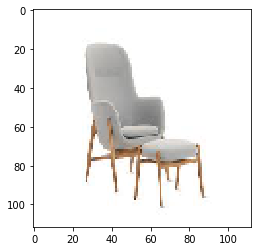

In [45]:
img_path = '/content/furniture/chair/chair (915).jpg'
from tensorflow.keras.preprocessing import image
# load the image with the required shape
img = image.load_img(img_path, target_size=(112, 112))
# check image
plt.imshow(img)
# convert the image to an array
img = image.img_to_array(img)         # tf.keras.processing
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)     # numpy

img = incep.preprocess_input(img)

**Build CAM**

In [46]:
# GradientTape 설정
with tf.GradientTape(persistent=True) as tape:
    conv_out, predict = grad_model(img)   # feature, predict
    class_out = predict[:, np.argmax(predict[0])]    # class     

# feature map
output = conv_out[0]
# Get gradient for input image

grads = tape.gradient(class_out, conv_out)[0]

# check grads' shape
#print(type(grads))
grads.shape, output.shape

(TensorShape([11, 11, 64]), TensorShape([11, 11, 64]))

In [51]:
# Average gradients spatially

weights = tf.reduce_mean(grads, axis=(0, 1))

# Build a map of filters according to gradients importance
cam = np.ones(output.shape[0:2], dtype=np.float32)
print(output)
for index, w in enumerate(weights):
    print(index, w, sep='         ')
    cam += w * output[:, :, index]

# check cam shape
cam.shape, weights.shape

tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

(TensorShape([11, 11]), TensorShape([64]))

> ### Blending CAM on original image

((178, 283, 3), numpy.ndarray)

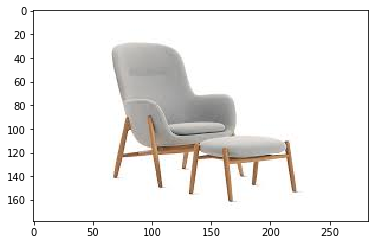

In [36]:
import cv2

# image read: ndarray type
img = cv2.imread(img_path)
# GBR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

plt.imshow(img)

img.shape, type(img)

- CAM with HeatMap **(추후 Rectangle로 변경 필요)**

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(178, 283, 3)

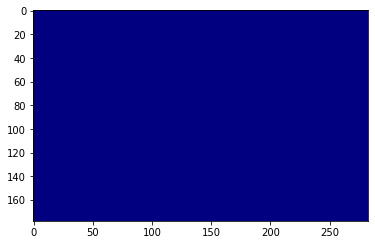

In [37]:
# resize cam
cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
print(cam)
# heatmap : minmax normalized one
heatmap = (cam - cam.min()) / (cam.max() - cam.min())
print(heatmap)
# convert heatmap to rgb
heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB

# check heatmap shape
plt.imshow(heatmap)
heatmap.shape

- Blending HeatMap on Image

In [0]:
# blending heatmap: image: 100%, heatmap: 50%
output_image = cv2.addWeighted(img.astype('uint8'), 1,  # 1: 100%
                               heatmap, 0.5,            # 0.5: 50%
                               0)

NameError: ignored

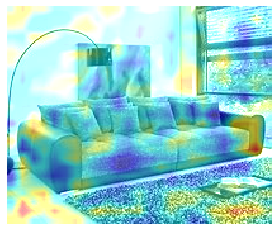

In [0]:
# plot blended image
plt.imshow(output_image)
plt.axis('off')
plt.title(decode_predictions(preds, top=2)[0][0][1])

In [0]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Validation Loss')
plt.semilogy(epochs, history.history['val_loss'], 'b', label='CNN')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Validation Accuray')
plt.semilogy(epochs, history.history['val_accuracy'], 'b', label='CNN')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.legend(loc='best')
plt.show()

In [0]:
print(np.max(history.history['val_accuracy']))